In [1]:
from IPython.display import clear_output
from ultralytics import YOLO
import plotly.express as px
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import time

C:\Users\User\anaconda3\envs\myenv_py_3_8_dl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\envs\myenv_py_3_8_dl\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\User\anaconda3\envs\myenv_py_3_8_dl\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#Предсказываем значения метрик для модели, которая получалась подбором оптимальных гиперпараметров
model = YOLO('runs/detect/tune2/weights/best.pt')
yolov8n_best = model.val()

Ultralytics YOLOv8.0.215 🚀 Python-3.8.18 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 168 layers, 3357389 parameters, 0 gradients, 9.7 GFLOPs


val: Scanning C:\Users\User\Documents\Projects\itmo_deep_learning\archive\valid\labels.cache... 4335 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4335/4335 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 271/271 [00:15<00:00, 17.41it/s]


                   all       4335       7669      0.735       0.62      0.701      0.499
        Главная дорога       4335        857      0.916      0.952      0.971      0.738
                  Дети       4335        208      0.787      0.841      0.894      0.668
Искусственная неровность       4335         99      0.853      0.859      0.898      0.644
Ограничение максимальной скорости       4335        343      0.845      0.886      0.916      0.668
         Зона действия       4335         81       0.71      0.802      0.763      0.528
Искусственная неровность       4335        135      0.964      0.799      0.931      0.671
    Пешеходный переход       4335       1698       0.85      0.911      0.943      0.676
Место остановки автобуса и (или) троллейбуса       4335        368      0.845      0.946      0.937       0.68
Конец зоны ограничения максимальной скорости       4335         16      0.699        0.5      0.609      0.389
            Стоп-линия       4335        103       

Пункт первой медицинской помощи       4335          3      0.549      0.333      0.645      0.458
     Стоянка запрещена       4335         19      0.784      0.947      0.957      0.762
       Движение налево       4335          1      0.299          1      0.995      0.597
Дорога для автомобилей       4335         12      0.919       0.95      0.983      0.691
Конец зоны всех ограничений       4335         11       0.79      0.545      0.675      0.496
Рекомендуемая скорость       4335         12       0.86          1      0.989      0.742
 Двустороннее движение       4335          4      0.654          1      0.787      0.662
Конец зоны запрещения обгона       4335         25      0.923        0.8      0.958      0.673
          Крутой спуск       4335          2      0.232        0.5      0.572      0.237
         Крутой подъём       4335         13      0.596      0.538      0.596      0.389
Примыкание второстепенной дороги       4335          1          1          0      0.497   

In [3]:
yolov8n_best.results_dict

{'metrics/precision(B)': 0.7349111837152824,
 'metrics/recall(B)': 0.6203489795445841,
 'metrics/mAP50(B)': 0.7010343550068103,
 'metrics/mAP50-95(B)': 0.4988565823349132,
 'fitness': 0.5190743596021029}

In [4]:
models_results_path = {
    'yolov8n':'runs/detect/yolov8n_ru_dataset_25',
    'yolov8s':'runs/detect/yolov8s_ru_dataset_25',
    'yolov8m':'runs/detect/yolov8m_ru_dataset_25'
}

In [5]:
results_df = pd.DataFrame()

for model in models_results_path:
    data = pd.read_csv(models_results_path[model]+'/results.csv')
    data['model_name'] = model
    results_df = pd.concat([results_df, data], axis=0)

In [6]:
results_df.head()

epoch           train/box_loss           train/cls_loss  \
0                        1                   1.4123                   4.2832   
1                        2                   1.2999                   2.5507   
2                        3                   1.2988                   1.8086   
3                        4                   1.2563                   1.2894   
4                        5                   1.1907                   1.1153   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  0.90561                  0.66993                  0.11422   
1                  0.88867                  0.53861                  0.19983   
2                  0.89321                  0.55576                  0.19413   
3                  0.88665                  0.54643                  0.28190   
4                  0.87320                  0.59824                  0.31784   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.11146                  0.07354                   1.1726   
1                  0.18550                  0.12142                   1.1793   
2                  0.21434                  0.13677                   1.2197   
3                  0.31506                  0.20824                   1.1193   
4                  0.39056                  0.27037                   1.0526   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                  1.59200                  0.87651                 0.003329   
1                  1.42100                  0.87863                 0.006399   
2                  1.41660                  0.89324                 0.009204   
3                  1.03400                  0.87094                 0.008812   
4                  0.94798                  0.85699                 0.008812   

                    lr/pg1                   lr/pg2 model_name  
0                 0.003329                 0.003329    yolov8n  
1                 0.006399                 0.006399    yolov8n  
2                 0.009204                 0.009204    yolov8n  
3                 0.008812                 0.008812    yolov8n  
4                 0.008812                 0.008812    yolov8n

In [7]:
results_df.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2', 'model_name'],
      dtype='object')

In [8]:
results_df.columns = [i.strip() for i in results_df.columns]

In [9]:
sns.set(rc={'figure.figsize':(12,6)})

In [10]:
metric = ['train/box_loss','train/cls_loss','train/dfl_loss','metrics/precision(B)','metrics/recall(B)','metrics/mAP50(B)','metrics/mAP50-95(B)']

In [11]:
i = 0

In [12]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'train/box_loss')]

In [13]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'train/cls_loss')]

In [14]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'train/dfl_loss')]

In [15]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'metrics/precision(B)')]

In [16]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'metrics/recall(B)')]

In [17]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'metrics/mAP50(B)')]

In [18]:
metric_name = metric[i]
i+=1
sns.lineplot(results_df, x='epoch', y=metric_name, hue='model_name').set(title=metric_name)

[Text(0.5, 1.0, 'metrics/mAP50-95(B)')]

In [22]:
model_paths = {
    'yolov8n':'runs/detect/yolov8n_ru_dataset_25/weights/best.pt',
    'yolov8s':'runs/detect/yolov8s_ru_dataset_25/weights/best.pt', 
    'yolov8m':'runs/detect/yolov8m_ru_dataset_25/weights/best.pt',
    'yolov8n_best':'runs/detect/tune2/weights/best.pt',
}

In [23]:
image_path = "archive/test/images/autosave01_02_2012_09_42_34.jpg"


image 1/1 C:\Users\User\Documents\Projects\itmo_deep_learning\archive\test\images\autosave01_02_2012_09_42_34.jpg: 384x640 2 Пешеходный переходs, 1 Уступите дорогу, 1 4121, 89.0ms
Speed: 2.0ms preprocess, 89.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


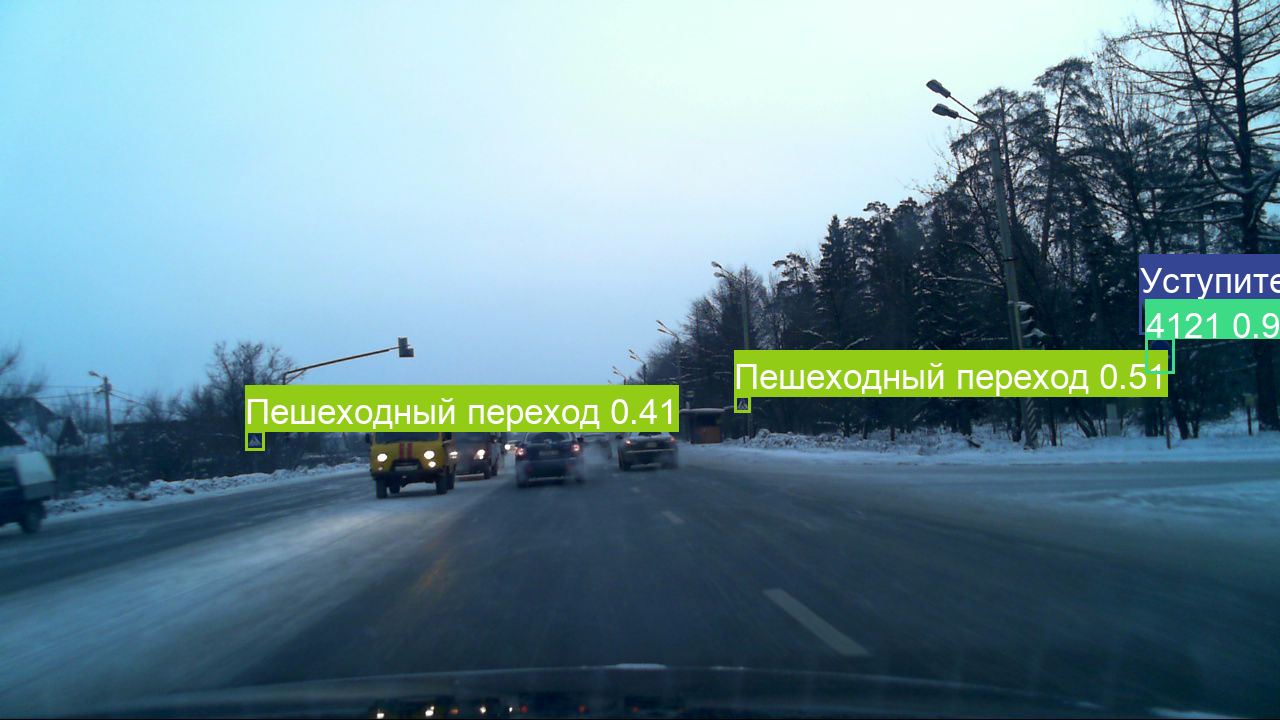

In [24]:
model = YOLO(model_paths['yolov8n'])
    
predict = model(image_path)

for r in predict:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
im


image 1/1 C:\Users\User\Documents\Projects\itmo_deep_learning\archive\test\images\autosave01_02_2012_09_42_34.jpg: 384x640 2 Пешеходный переходs, 1 Уступите дорогу, 1 4121, 69.0ms
Speed: 1.0ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


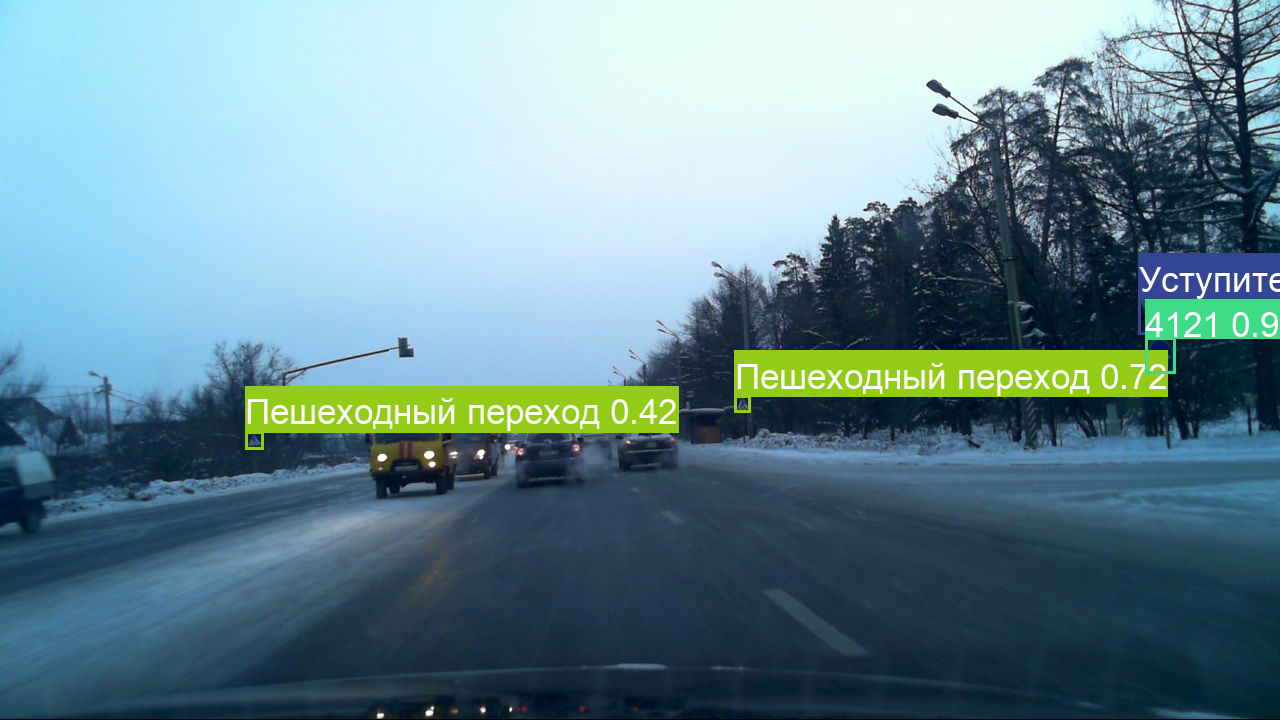

In [26]:
model = YOLO(model_paths['yolov8s'])
    
predict = model(image_path)

for r in predict:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
im


image 1/1 C:\Users\User\Documents\Projects\itmo_deep_learning\archive\test\images\autosave01_02_2012_09_42_34.jpg: 384x640 1 Пешеходный переход, 1 Уступите дорогу, 1 4121, 77.0ms
Speed: 4.0ms preprocess, 77.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


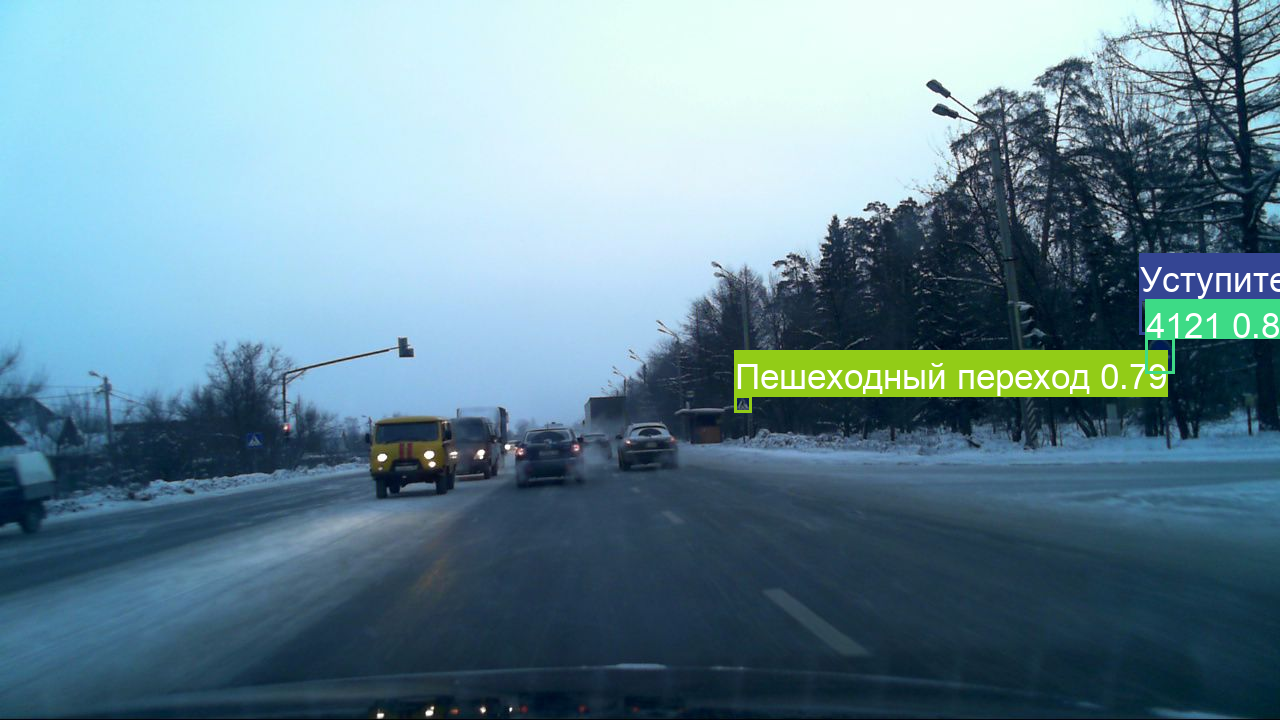

In [27]:
model = YOLO(model_paths['yolov8m'])
    
predict = model(image_path)

for r in predict:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
im


image 1/1 C:\Users\User\Documents\Projects\itmo_deep_learning\archive\test\images\autosave01_02_2012_09_42_34.jpg: 384x640 2 Пешеходный переходs, 1 Уступите дорогу, 1 4121, 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


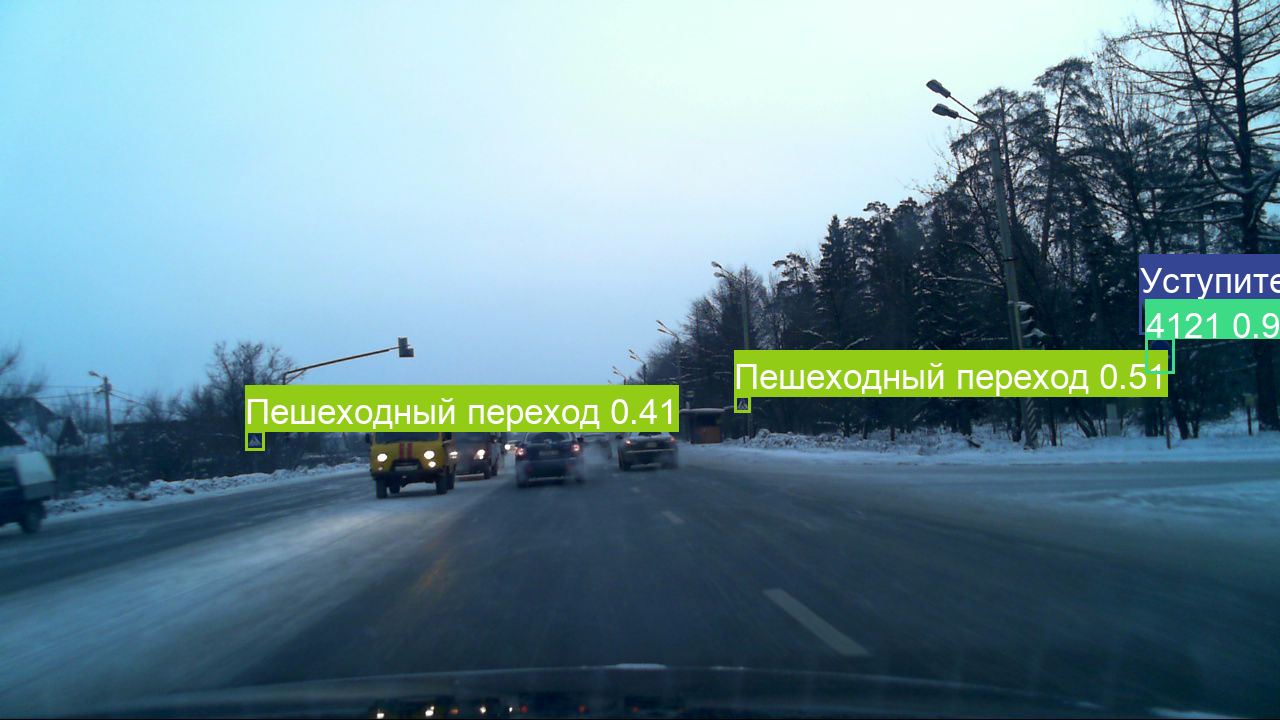

In [28]:
model = YOLO(model_paths['yolov8n'])
    
predict = model(image_path)

for r in predict:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
im


image 1/1 C:\Users\User\Documents\Projects\itmo_deep_learning\archive\test\images\autosave01_02_2012_09_42_34.jpg: 384x640 2 Пешеходный переходs, 1 Место остановки автобуса и (или) троллейбуса, 1 Уступите дорогу, 1 4121, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


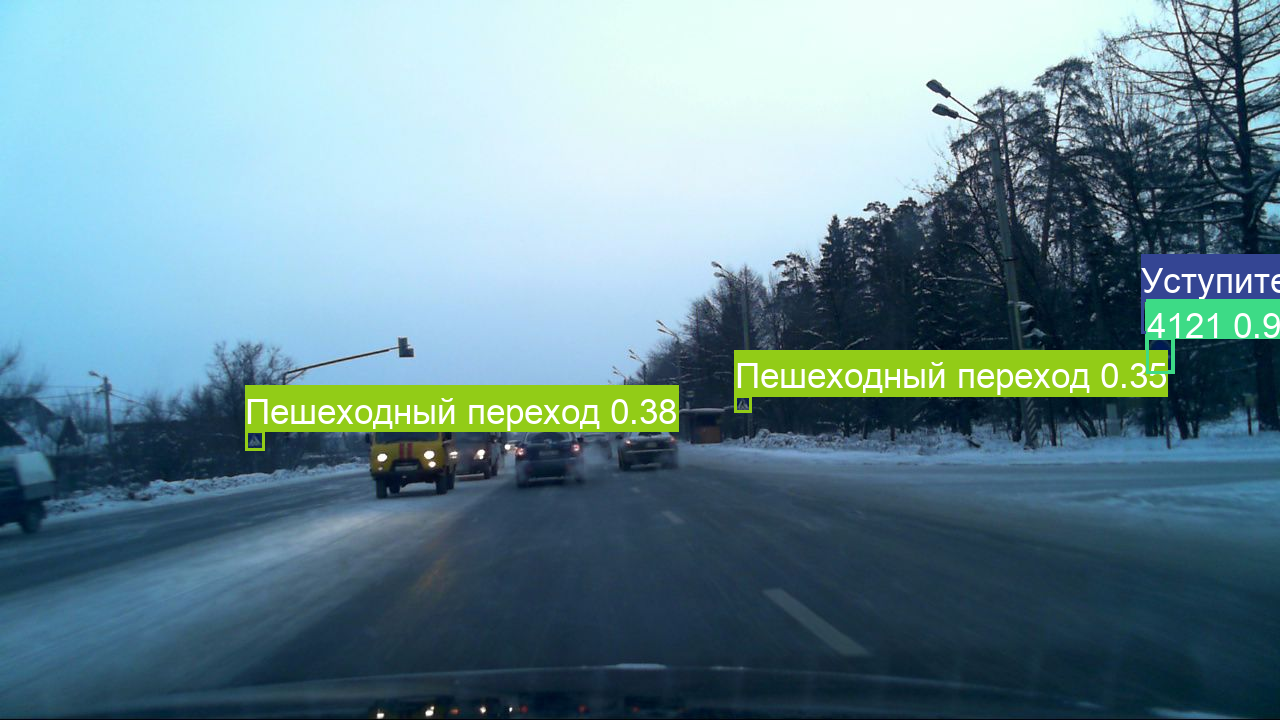

In [29]:
model = YOLO(model_paths['yolov8n_best'])
    
predict = model(image_path)

for r in predict:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
im

In [54]:
result_metrics_img = {}

for model_path in model_paths:
    result = []
    
    model = YOLO(model_paths[model_path])
     
    for _ in range(1000):
        start = time.time()
        predict = model(image_path)
        end = time.time()

        result.append(end-start)
        clear_output(wait=True)
    
    result_metrics_img[model_path] = round(np.mean(result),3)


image 1/1 C:\Users\User\Documents\Projects\itmo_deep_learning\archive\test\images\autosave01_02_2012_09_42_34.jpg: 384x640 2 Пешеходный переходs, 1 Место остановки автобуса и (или) троллейбуса, 1 Уступите дорогу, 1 4121, 3.0ms
Speed: 2.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [55]:
result_metrics_img

{'yolov8n': 0.018, 'yolov8s': 0.017, 'yolov8m': 0.019, 'yolov8n_best': 0.018}

In [56]:
#15s 7.4MB 458 frames

video_path = 'example_video_small.mp4'

In [57]:
result_metrics_video = {}

for model_path in model_paths:
    result = []
    
    model = YOLO(model_paths[model_path])
     
    for _ in range(1):
        start = time.time()
        predict = model(video_path)
        end = time.time()

        result.append(end-start)
        clear_output(wait=True)
    
    result_metrics_video[model_path] = round(np.mean(result),3)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Пешеходный переход, 4.0ms
video 1/1 (2/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (3/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Пешеходный переход, 4.0ms
video 1/1 (4/458) C:\Users\User\Documents\Projects\itmo_deep_learnin

video 1/1 (57/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 4.0ms
video 1/1 (58/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 4.0ms
video 1/1 (59/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 3.0ms
video 1/1 (60/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 4 Пешеходный переходs, 3.0ms
video 1/1 (61/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 4 Пешеходный переходs, 3.0ms
video 1/1 (62/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 4.0ms
video 1/1 (63/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 4 Пешеходный переходs, 1 Объезд препятствия слева, 3.0ms
video 1/1 (64/458) C:\Users\User\Document

video 1/1 (110/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 1 Объезд препятствия слева, 3.0ms
video 1/1 (111/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 1 Круговое движение, 1 Объезд препятствия слева, 3.0ms
video 1/1 (112/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 1 Объезд препятствия слева, 3.0ms
video 1/1 (113/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 1 Объезд препятствия слева, 4.0ms
video 1/1 (114/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 1 Подземный пешеходный переход, 1 Объезд препятствия слева, 3.0ms
video 1/1 (115/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 3 Пешеходный переходs, 1 Объезд 

video 1/1 (168/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 4.0ms
video 1/1 (169/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (170/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Направления движения по полосе, 4.0ms
video 1/1 (171/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 4.0ms
video 1/1 (172/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 2 Направления движения по полосеs, 3.0ms
video 1/1 (173/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 2 Направления движения по полосеs, 3.0ms
video 1/1 (174/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (175/458) C:\Users\User\Documents\Project

video 1/1 (232/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (233/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (234/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 4.0ms
video 1/1 (235/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (236/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (237/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (238/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 5.0ms
video 1/1 (239/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640

video 1/1 (295/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия слева, 3.0ms
video 1/1 (296/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия слева, 4.0ms
video 1/1 (297/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа или слева, 1 Объезд препятствия слева, 3.0ms
video 1/1 (298/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа или слева, 1 Объезд препятствия слева, 3.0ms
video 1/1 (299/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия слева, 3.0ms
video 1/1 (300/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия слева, 4.0ms
video 1/1 (301/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_sm

video 1/1 (348/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа, 2 Объезд препятствия слеваs, 5.0ms
video 1/1 (349/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа, 1 Объезд препятствия слева, 4.0ms
video 1/1 (350/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа, 1 Объезд препятствия слева, 4.0ms
video 1/1 (351/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа, 1 Объезд препятствия слева, 5.0ms
video 1/1 (352/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа, 3.0ms
video 1/1 (353/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 1 Объезд препятствия справа, 1 Объезд препятствия слева, 3.0ms
video 1/1 (354/458)

video 1/1 (408/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (409/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 4.0ms
video 1/1 (410/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (411/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (412/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (413/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 4.0ms
video 1/1 (414/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640 (no detections), 3.0ms
video 1/1 (415/458) C:\Users\User\Documents\Projects\itmo_deep_learning\example_video_small.mp4: 384x640

In [58]:
result_metrics_video

{'yolov8n': 4.228, 'yolov8s': 4.2, 'yolov8m': 5.084, 'yolov8n_best': 4.183}

In [60]:
for i in result_metrics_video:
    print(result_metrics_video[i]/458)

0.009231441048034934
0.009170305676855896
0.011100436681222707
0.009133187772925764


In [34]:
models_params = {
    'names': ['yolov8n', 'yolov8s', 'yolov8m'],
    'layers' : [225, 225, 295],
    'parameters' : [3362805, 11195585, 25946065],
    'gradients': [3362789, 11195569, 25946049],
    'GFLOPs' : [9.8, 29.0, 79.6],
    'time train 1ep, hour': [0.050, 0.071, 0.122], #hours
    'size (pixels)' : [640, 640, 640],
    'speed_preprocess (ms)*': [0.1, 0.1, 0.1], #ms
    'speed_inference (ms)*': [0.4, 0.8, 1.7], #ms
    'speed_postprocess (ms)*': [0.5, 0.5, 0.4], #ms
    'speed_inference_my_page (s)**': [0.018, 0.017, 0.02],
}

In [35]:
df = pd.DataFrame(models_params)

In [36]:
df

names  layers  parameters  gradients  GFLOPs  time train 1ep, hour  \
0  yolov8n     225     3362805    3362789     9.8                 0.050   
1  yolov8s     225    11195585   11195569    29.0                 0.071   
2  yolov8m     295    25946065   25946049    79.6                 0.122   

   size (pixels)  speed_preprocess (ms)*  speed_inference (ms)*  \
0            640                     0.1                    0.4   
1            640                     0.1                    0.8   
2            640                     0.1                    1.7   

   speed_postprocess (ms)*  speed_inference_my_page (s)**  
0                      0.5                          0.018  
1                      0.5                          0.017  
2                      0.4                          0.020

In [37]:
metrics = ['metrics/precision(B)','metrics/recall(B)','metrics/mAP50(B)','metrics/mAP50-95(B)']

In [38]:
yolov8n_best.results_dict

{'metrics/precision(B)': 0.7349111837152824,
 'metrics/recall(B)': 0.6203489795445841,
 'metrics/mAP50(B)': 0.7010343550068103,
 'metrics/mAP50-95(B)': 0.4988565823349132,
 'fitness': 0.5190743596021029}

In [39]:
metrics_results_df = results_df[results_df['epoch']==25][['model_name']+metrics]
metrics_results_df = metrics_results_df

In [40]:
subdf = pd.DataFrame([yolov8n_best.results_dict]).drop('fitness', axis=1)
subdf['model_name'] = 'yolov8n_best'

In [82]:
df = pd.concat([metrics_results_df, subdf]).reset_index().drop('index', axis=1)
df.columns = [i.replace('metrics/','').replace('(B)','') for i in df.columns]
df['speed_inf_img (90КБ) (s)'] = [result_metrics_img[i] for i in result_metrics_img]
df['speed_inf_vid (15s 7.4MB 458 frames) (s)'] = [result_metrics_video[i] for i in result_metrics_video]

In [83]:
round(df,3)

model_name  precision  recall  mAP50  mAP50-95  speed_inf_img (90КБ) (s)  \
0       yolov8n      0.725   0.634  0.701     0.513                     0.018   
1       yolov8s      0.770   0.754  0.825     0.623                     0.017   
2       yolov8m      0.876   0.768  0.868     0.662                     0.019   
3  yolov8n_best      0.735   0.620  0.701     0.499                     0.018   

   speed_inf_vid (15s 7.4MB 458 frames) (s)  
0                                     4.228  
1                                     4.200  
2                                     5.084  
3                                     4.183

In [84]:
df.to_dict('dict')

{'model_name': {0: 'yolov8n', 1: 'yolov8s', 2: 'yolov8m', 3: 'yolov8n_best'},
 'precision': {0: 0.72519, 1: 0.77013, 2: 0.87558, 3: 0.7349111837152824},
 'recall': {0: 0.63378, 1: 0.75434, 2: 0.76791, 3: 0.6203489795445841},
 'mAP50': {0: 0.70112, 1: 0.82504, 2: 0.8676, 3: 0.7010343550068103},
 'mAP50-95': {0: 0.51279, 1: 0.62334, 2: 0.66204, 3: 0.4988565823349132},
 'speed_inf_img (90КБ) (s)': {0: 0.018, 1: 0.017, 2: 0.019, 3: 0.018},
 'speed_inf_vid (15s 7.4MB 458 frames) (s)': {0: 4.228,
  1: 4.2,
  2: 5.084,
  3: 4.183}}